**Question 1:**
Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


Importing iris dataset from sklearn

In [2]:
from sklearn.datasets import load_iris
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data.data.shape

(150, 4)

In [5]:
data.target.shape

(150,)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Spliting the train and test data

In [7]:
from sklearn.model_selection import train_test_split ## training and testing
from sklearn.linear_model import LogisticRegression  ## for logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix ## checking accuracy and confusion matrix 
from sklearn.preprocessing import StandardScaler ## scaling down the features

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(data.data,data.target,test_size=0.2,random_state=0)

In [9]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (120, 4)

 xtest: (30, 4)

 ytrain: (120,)

 ytest: (30,)


In [10]:
scaler= StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [11]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Logistic Regression

In [12]:
log_reg=LogisticRegression()
log_reg.fit(scaled_xtrain,ytrain)   ## as we have scaled down the xtrain we use scaled_xtrain

LogisticRegression()

In [13]:
ypred=log_reg.predict(scaled_xtest)

In [14]:
ypred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [15]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=ytest
df_predicted['Predicted']=ypred
df_predicted.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [16]:
print('ACcuracy:',accuracy_score(ytest,ypred)*100)

ACcuracy: 76.66666666666667


By Logistic Regression we got 76% Accuracy

In [17]:
matrix=confusion_matrix(ytest,ypred) 
matrix

array([[11,  0,  0],
       [ 0,  6,  7],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

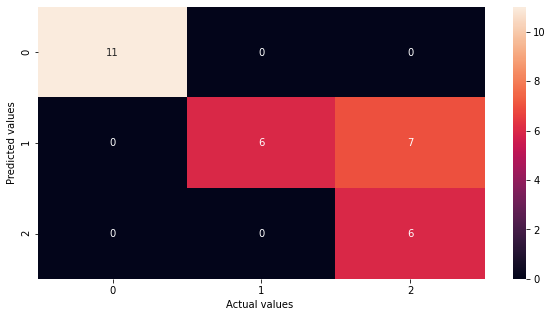

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

# **Fitting K-NN classifier to the training set **

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [20]:
 #Predicting the test set result  
 ypred=classifier.predict(xtest)

In [21]:
#Creating the Confusion matrix  
matrix1= confusion_matrix(ytest,ypred)
matrix1

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

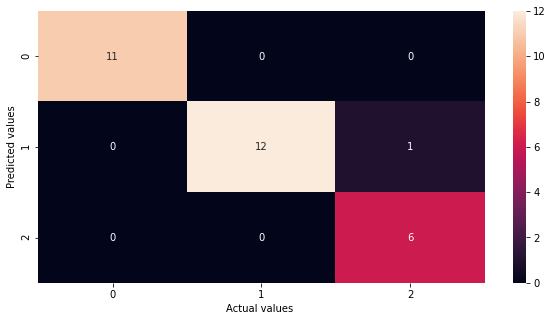

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix1,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

In [23]:
## Checking the Accuracy
print('ACcuracy:',accuracy_score(ytest,ypred)*100)

ACcuracy: 96.66666666666667


By KNN we got 96% Accuracy  which is more than Logistic Regresion.
Hence we conclude that we should use KNN for this dataset.
